In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from scipy.interpolate import interp1d
import random

print(os.getcwd())
# os.chdir('../')
print(os.getcwd())

/Users/bb320/Library/CloudStorage/GoogleDrive-burint@bnmanalytics.com/My Drive/Imperial/01_Projects/TeamofRivals/Analysis/Con2vec-1/Python
/Users/bb320/Library/CloudStorage/GoogleDrive-burint@bnmanalytics.com/My Drive/Imperial/01_Projects/TeamofRivals/Analysis/Con2vec-1


In [3]:
def data_prep(df, cluster):

    df = df[df['Cluster_Label'] == cluster]
    df = df[df['PairID'] == random.choice(df['PairID'].unique())]

    # Group by 'Speaker' and 'Turn' and perform aggregations
    turn_speaker_data = df.groupby(['Cluster_Label', 'PairID','Speaker', 'Turn']).agg(
        avg_word_count=('word_count', 'mean'),
        avg_sentiment=('Sentiment', 'mean'),
        count_backchannels=('Backchannel', 'sum'),
        mean_overlaps=('Overlap', 'mean'),
        mean_contested=('Contested', 'mean')
    ).reset_index()

    # Group by 'Turn' and perform aggregations
    turn_level_data = df.groupby(['Cluster_Label', 'PairID','Turn']).agg(
        avg_word_count=('word_count', 'mean'),
        avg_sentiment=('Sentiment', 'mean'),
        count_backchannels=('Backchannel', 'sum'),
        mean_overlaps=('Overlap', 'mean'),
        mean_contested=('Contested', 'mean')
    ).reset_index()
    
    return turn_speaker_data, turn_level_data


In [13]:
def plot_timeplot(turn_speaker_data_A, turn_speaker_data_B, turn_speaker_data_Both, turn_level_data):
    # Initialize a figure
    fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained', figsize=(18, 8))

    # Set a modern color palette for two speakers
    speaker_palette = ["#0e86d4", "#fd7f20"]

    # Increase font sizes for readability
    plt.rcParams.update({'font.size': 20})

    x_var = 'Turn'


    ax1.bar(
        turn_speaker_data_A[x_var], 
        turn_speaker_data_A['avg_word_count'],
        align = 'center',
        # width = turn_speaker_data_A['Turn_duration'],
        width = 1,
        edgecolor='none',
        label="Speaker A",
        color=speaker_palette[0],
        alpha = .6
    )


    ax1.bar(
        turn_speaker_data_B[x_var], 
        turn_speaker_data_B['avg_word_count'],
        align = 'center',
        # width = turn_speaker_data_B['Turn_duration'],
        width = 1,
        edgecolor='none',
        label="Speaker B",
        color=speaker_palette[1],
        alpha = .6
    )

    ax1.bar(
        turn_speaker_data_Both[x_var], 
        turn_speaker_data_Both['avg_word_count'],
        align = 'center',
        # width = turn_speaker_data_Both['Turn_duration'],
        width = 1,
        edgecolor='none',
        label="Speaker A & B",
        alpha = .3,
        hatch='//', color = '#db1f48', facecolor = '#db1f48'
    )

    x_new = np.linspace(turn_level_data[x_var].min(), turn_level_data[x_var].max(),500)
    f = interp1d(turn_level_data[x_var], turn_level_data['avg_sentiment'], kind='quadratic')
    y_smooth=f(x_new)

    ax2.plot(x_new,
                y_smooth,
                label="Sentiment",
                color='#4C1F7A',
                linewidth=2)

    ax3 = ax2.twinx()

    ax2.fill_between(turn_level_data[x_var], turn_level_data['mean_contested'],
                label='Contested',
                alpha=0.3, step='mid', hatch='//', color = '#db1f48', facecolor = '#db1f48')


    mask_Back = turn_level_data['count_backchannels'] != 0

    ax2.scatter(turn_level_data[x_var][mask_Back], turn_level_data['count_backchannels'][mask_Back] * 0,
                    label='Backchannel',
                    s = 100,
                    marker = 'x',
                    color='#007F73')

    mask_Over = turn_level_data['mean_overlaps'] != 0

    ax2.scatter(turn_level_data[x_var][mask_Over], turn_level_data['mean_overlaps'][mask_Over] * 0,
                    label='Overlap',
                    marker = 'o',
                    s = 70,
                    facecolors='none',
                    color='#db1f48')


    # Customize the plot
    # fig.title('Conversational Dynamics by Speaker', pad=100)
    ax2.set_xlabel(x_var, fontsize = 20)
    ax1.set_ylabel('Word Count (log-scale)', fontsize = 20)
    ax1.set_yscale('log')
    ax1.margins(x=0)
    ax2.set_ylabel('Sentiment', fontsize = 20)
    ax2.margins(x=0)
    ax3.set_ylabel('Overlapping \nSpeakers', fontsize = 20)
    ax3.set_yticklabels([])
    ax3.set_yticks([])
    ax3.margins(x=0)
    # ax2.set_ylim(-1.2, 1.2)
    ax1.tick_params(axis='both', which='major', labelsize=20)
    ax2.tick_params(axis='both', which='major', labelsize=20)
    fig.legend(loc='upper center',
            #    bbox_to_anchor=(.5, 1.05),
                ncol=4,
                frameon=False)

    # Remove grid lines for a cleaner look
    plt.grid(False)

    # Show the plot
    plt.tight_layout()
    fig.subplots_adjust(top=0.85)  # Adjusts top spacing to fit the legend

    plt.show()

/var/folders/pz/gk2tz1l92yd7r5jl_7s8l8d00000gp/T/ipykernel_9145/489529706.py:110: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


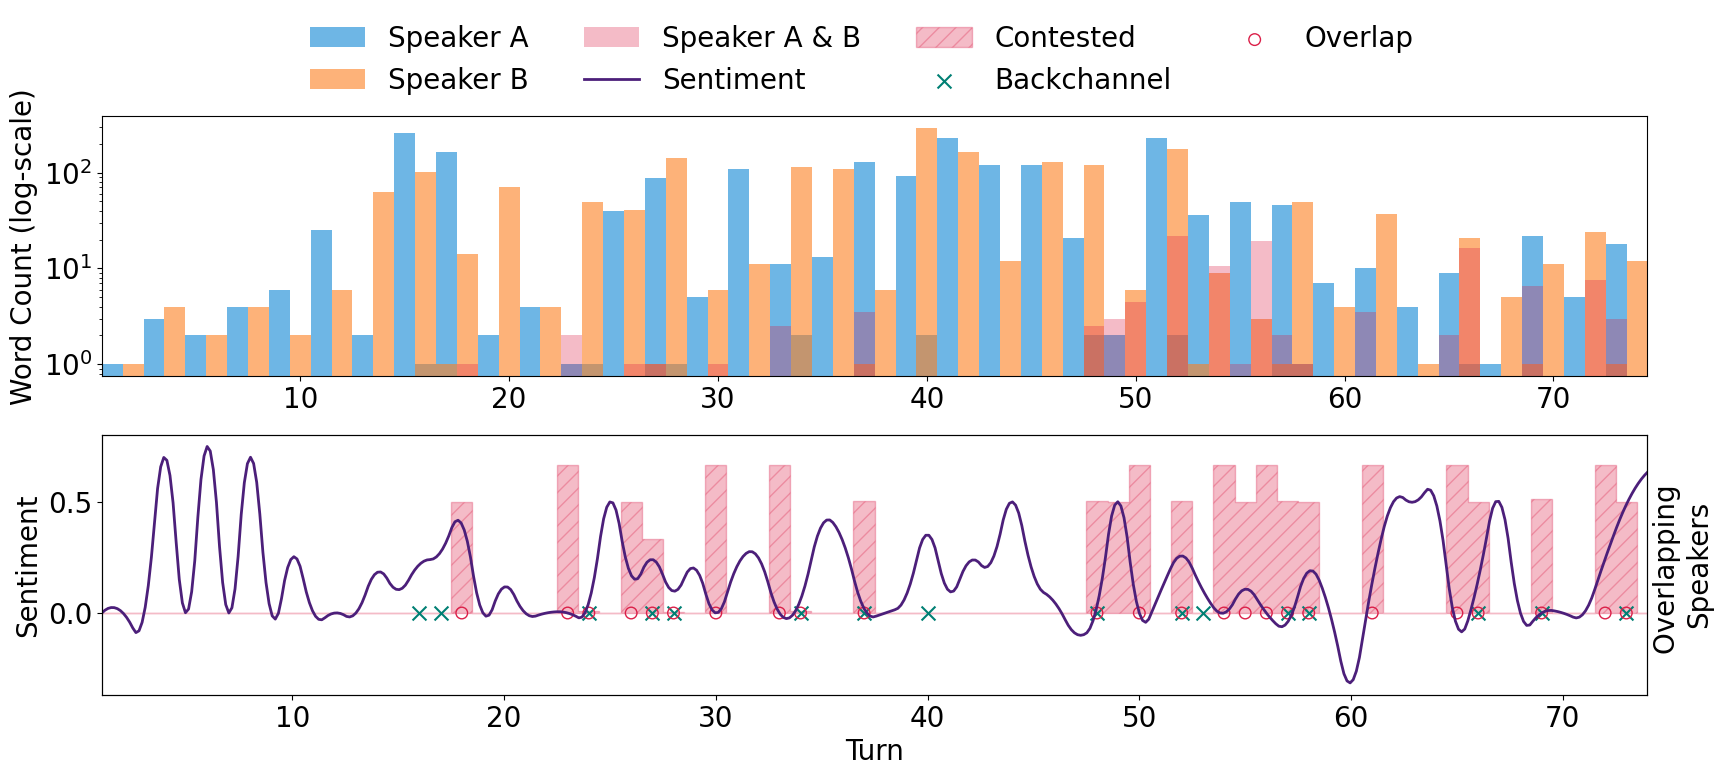

In [11]:
df = pd.read_csv(os.path.join('Output', 'super_May22', 'Segmented_Conversations_With_Conflicts.csv'))
turn_speaker_data, turn_level_data = data_prep(df, cluster = "Low Conflict")

turn_speaker_data_A = turn_speaker_data[turn_speaker_data['Speaker'] == 'A']
turn_speaker_data_B = turn_speaker_data[turn_speaker_data['Speaker'] == 'B']
turn_speaker_data_Both = turn_speaker_data[turn_speaker_data['Speaker'] == 'Both']

plot_timeplot(turn_speaker_data_A, turn_speaker_data_B, turn_speaker_data_Both, turn_level_data)